# Steam Games Rating Prediction
In this exploration notebook, we will demonstrate the entire pipeline of our project.

First, we import external libraries along with the dataset that will be used throughout the project. 

We then proceed with the preprocessing phase, normalizing the given average ratings in terms of the number of total ratings (amongst other factors).

Then we clean the data to adhere to the preferred format of our machine learning models (namely numerical values for classification).

Finally, we attempt to implement the decision tree and support vector machine models, comparing their performance on our given testing dataset.

## Importing libraries

In [374]:
# External Libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from numpy import ravel
from sklearn.calibration import column_or_1d
import warnings

## Importing the dataset

In [375]:
data = pd.read_csv("datasets/steam_games_2024.csv")
data.head()

,appid,name,price,release_date,required_age,publishers,developers,categories,genres,ratings,totalRatings,average_playtime,median_playtime,num_owners
0,10,Counter-Strike,7.19,2000-11-01,0,Valve,Valve,Multi-player;Online Multi-Player;Local Multi-P...,Action,97.39,127873,17612,317,10000000-20000000
1,20,Team Fortress Classic,3.99,1999-04-01,0,Valve,Valve,Multi-player;Online Multi-Player;Local Multi-P...,Action,83.98,3951,277,62,5000000-10000000
2,30,Day of Defeat,3.99,2003-05-01,0,Valve,Valve,Multi-player;Valve Anti-Cheat enabled,Action,89.56,3814,187,34,5000000-10000000
3,40,Deathmatch Classic,3.99,2001-06-01,0,Valve,Valve,Multi-player;Online Multi-Player;Local Multi-P...,Action,82.66,1540,258,184,5000000-10000000
4,50,Half-Life: Opposing Force,3.99,1999-11-01,0,Valve,Gearbox Software,Single-player;Multi-player;Valve Anti-Cheat en...,Action,94.80,5538,624,415,5000000-10000000


# Split Data
we split dataset before calculating average weighted rating to avoid data leakage

In [376]:
from sklearn.model_selection import train_test_split

features_train, features_test =  train_test_split(data, test_size=0.2 , random_state=42 )



# Data Exploration

In this phase of the project, we got an overview of what our data looks like. This helps us target features that we hope can help us in our data models.

We begin by analyzing easily quantifiable metrics such as total ratings and average playtime. Intuition tells us that these will be amongst the more important features to emphasize and categorize.

Then we begin exploring other less quantifiable metrics such as publisher/developer reputation and genres/game categories.

## Distribution of Ratings

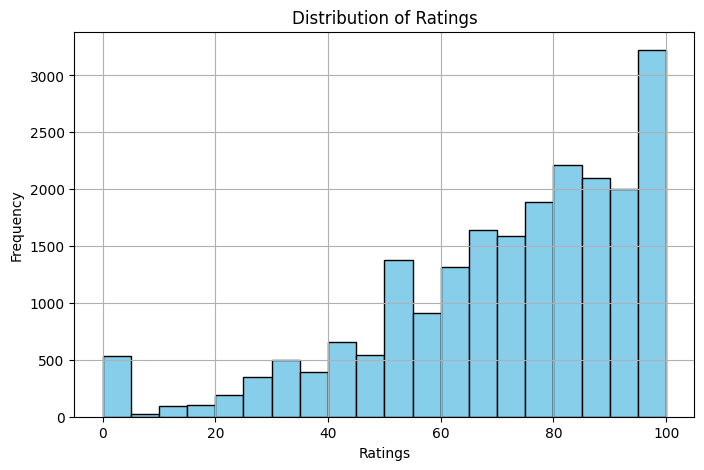

In [377]:
plt.figure(figsize=(8, 5))
plt.hist(features_train['ratings'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

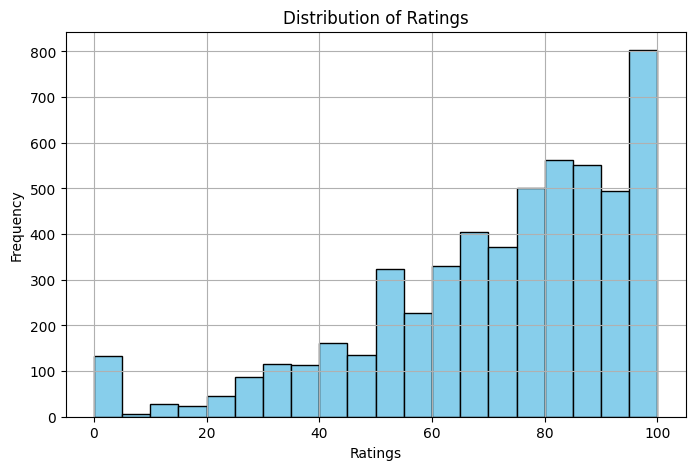

In [378]:
plt.figure(figsize=(8, 5))
plt.hist(features_test['ratings'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Average Playtime versus Ratings

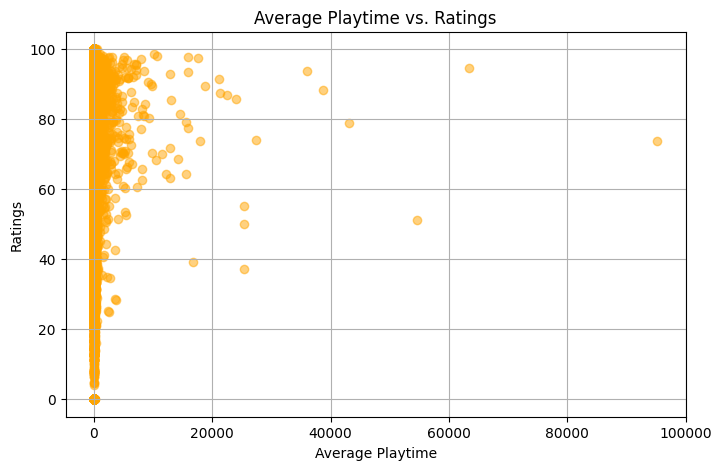

In [379]:
plt.figure(figsize=(8, 5))
plt.scatter(features_train['average_playtime'], features_train['ratings'], alpha=0.5, color='orange')
plt.title('Average Playtime vs. Ratings')
plt.xlabel('Average Playtime')
plt.ylabel('Ratings')
plt.grid(True)
plt.show()

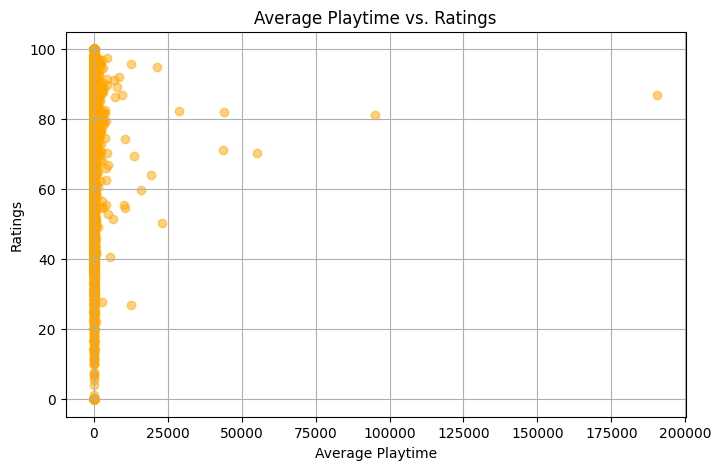

In [380]:
plt.figure(figsize=(8, 5))
plt.scatter(features_test['average_playtime'], features_test['ratings'], alpha=0.5, color='orange')
plt.title('Average Playtime vs. Ratings')
plt.xlabel('Average Playtime')
plt.ylabel('Ratings')
plt.grid(True)


## Number of Games released over time

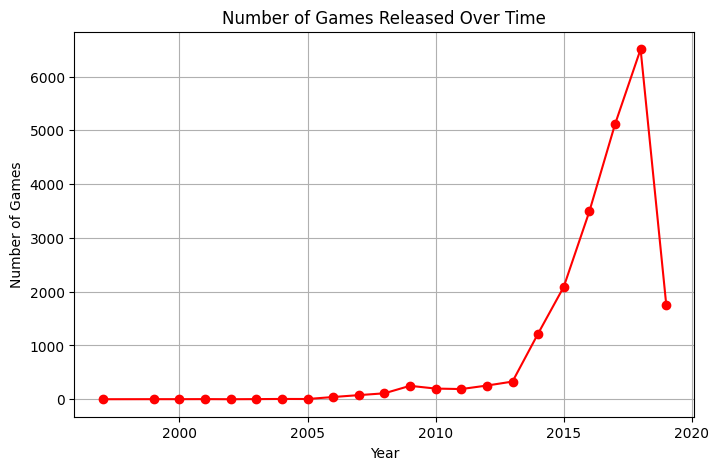

In [381]:
plt.figure(figsize=(8, 5))
features_train['release_date'] = pd.to_datetime(features_train['release_date'])
features_train['release_year'] = features_train['release_date'].dt.year
games_per_year = features_train.groupby('release_year').size()
games_per_year.plot(marker='o', color='red')
plt.title('Number of Games Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

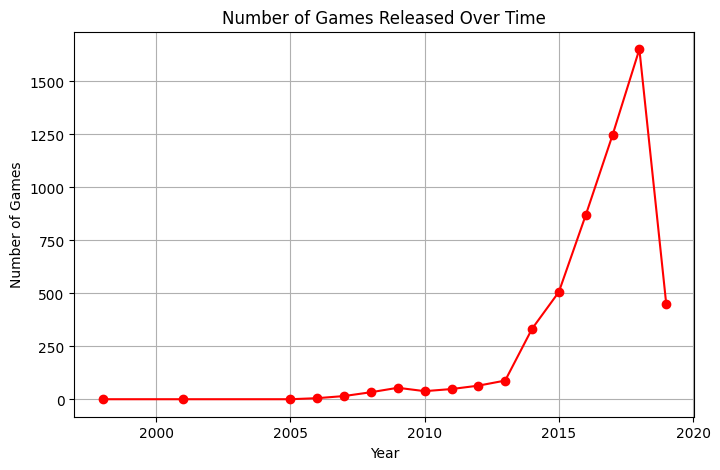

In [382]:
plt.figure(figsize=(8, 5))
features_test['release_date'] = pd.to_datetime(features_test['release_date'])
features_test['release_year'] = features_test['release_date'].dt.year
games_per_year = features_test.groupby('release_year').size()
games_per_year.plot(marker='o', color='red')
plt.title('Number of Games Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

## Top Genres Distribution

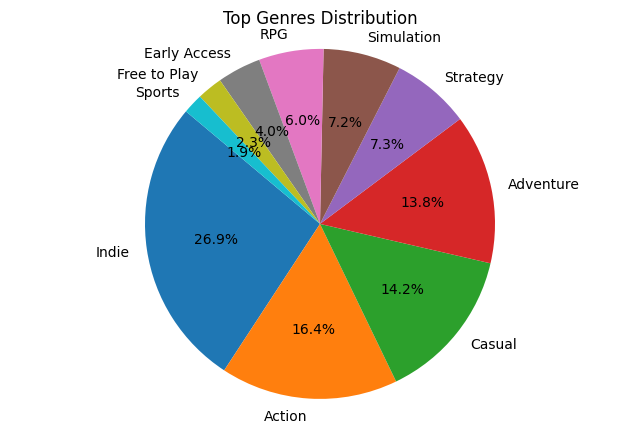

In [383]:
# Count occurrences of each genre
genre_counts = features_train['genres'].str.split(';').explode().value_counts()
# Select the top 10 genres
top_genres = genre_counts.head(10)

# Create a pie chart for top genres
plt.figure(figsize=(8, 5))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140)
plt.title('Top Genres Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

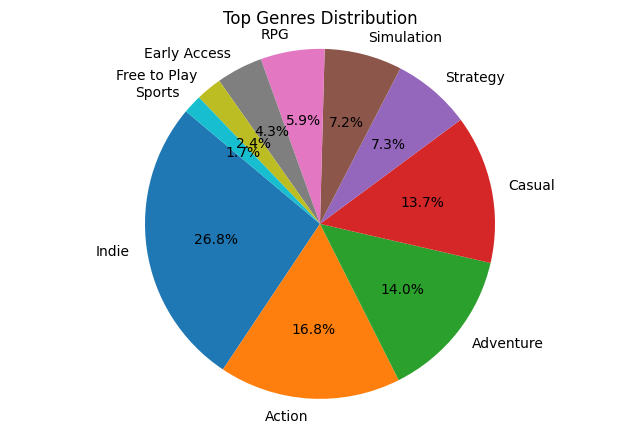

In [384]:
# Count occurrences of each genre
genre_counts = features_test['genres'].str.split(';').explode().value_counts()
# Select the top 10 genres
top_genres = genre_counts.head(10)

# Create a pie chart for top genres
plt.figure(figsize=(8, 5))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140)
plt.title('Top Genres Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Top publishers and developers

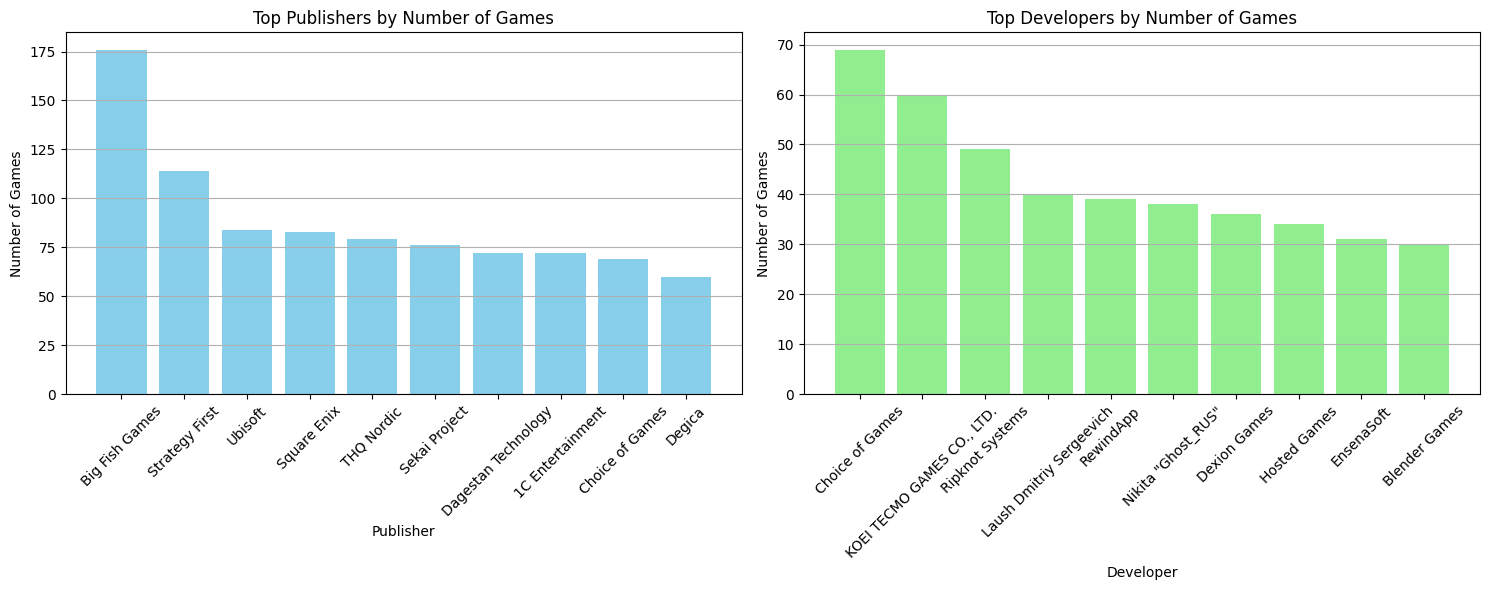

In [385]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Top Publishers
top_publishers = features_train['publishers'].value_counts().head(10)
axs[0].bar(top_publishers.index, top_publishers.values, color='skyblue')
axs[0].set_title('Top Publishers by Number of Games')
axs[0].set_xlabel('Publisher')
axs[0].set_ylabel('Number of Games')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y')

# Top Developers
top_developers = features_train['developers'].value_counts().head(10)
axs[1].bar(top_developers.index, top_developers.values, color='lightgreen')
axs[1].set_title('Top Developers by Number of Games')
axs[1].set_xlabel('Developer')
axs[1].set_ylabel('Number of Games')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y')

# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

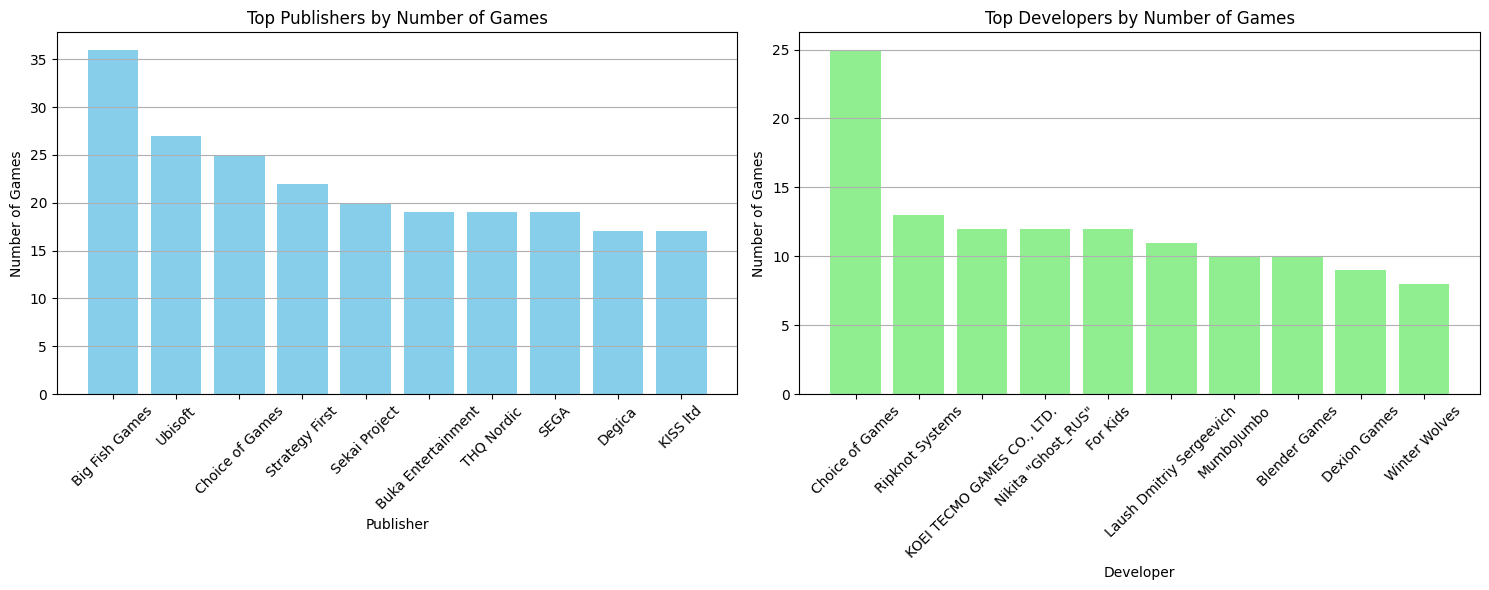

In [386]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Top Publishers
top_publishers = features_test['publishers'].value_counts().head(10)
axs[0].bar(top_publishers.index, top_publishers.values, color='skyblue')
axs[0].set_title('Top Publishers by Number of Games')
axs[0].set_xlabel('Publisher')
axs[0].set_ylabel('Number of Games')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y')

# Top Developers
top_developers = features_test['developers'].value_counts().head(10)
axs[1].bar(top_developers.index, top_developers.values, color='lightgreen')
axs[1].set_title('Top Developers by Number of Games')
axs[1].set_xlabel('Developer')
axs[1].set_ylabel('Number of Games')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y')

# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

## High Average Rating with Low number of ratings

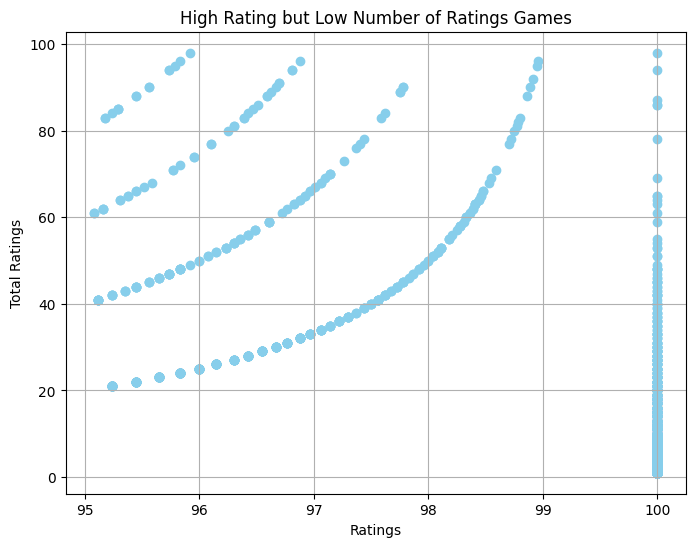

In [387]:
# Define thresholds for high ratings and low numbers of ratings
high_rating_threshold = 95  
low_ratings_threshold = 100 
filtered_df = data[(data['ratings'] > high_rating_threshold) & (data['totalRatings'] < low_ratings_threshold)]

# Create a scatter plot for high average rating but low number of ratings games
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['ratings'], filtered_df['totalRatings'], color='skyblue')
plt.title('High Rating but Low Number of Ratings Games')
plt.xlabel('Ratings')
plt.ylabel('Total Ratings')
plt.grid(True)
plt.show()

# Data preprocessing
In this section we begin by dealing with the most glaring problem we noticed with the dataset: the high rated games with small number of ratings.

These games would easily affect the accuracy of our models as they simply have not stood the test of enough users. 

In the meantime, we hoped to tackle another common issue amongst any given rating system. 

How to compare close average ratings but with a very large discrepancy in total number of ratings? 

Is a rating of 96 with 50 reviews a stronger candidate than a game with a rating of 93 but with 200 reviews?

## Weighted rating
We thus introduced a new column feature "weighted rating" which takes into account the total number of ratings and compares it to the 50th percentile of total ratings.

It uses the following formula: $total / (total + m) * avg + (m / total + m) * C$

In essence, this formula normalizes all our rated games. It removes outliers that do not satisfy the minimum threshold of total ratings.

In [388]:
# Determine the minimum number of ratings required to be listed, using the 50th percentile as a threshold
m = features_train['totalRatings'].quantile(0.50)

# Calculate C, the mean rating across all games
C = features_train['ratings'].mean()

# Apply the weighted rating formula
features_train['weighted_rating'] = (features_train['totalRatings'] / (features_train['totalRatings'] + m) * features_train['ratings']) + (m / (features_train['totalRatings'] + m) * C)

# Display the first few rows to verify the calculation
features_train[['name', 'ratings', 'totalRatings', 'weighted_rating']]
sorted = features_train.sort_values(by=['totalRatings'], ascending=False)
new = sorted[sorted['totalRatings']> m]
new[['appid', 'name','ratings', 'weighted_rating', 'totalRatings']].head()

,appid,name,ratings,weighted_rating,totalRatings
25,730,Counter-Strike: Global Offensive,86.80,86.799823,3046717
22,570,Dota 2,85.87,85.869497,1005586
19,440,Team Fortress 2,93.81,93.808574,549915
2478,271590,Grand Theft Auto V,70.26,70.260086,468369
1467,218620,PAYDAY 2,84.52,84.518743,365180


In [389]:
# Determine the minimum number of ratings required to be listed, using the 50th percentile as a threshold
m = features_test['totalRatings'].quantile(0.50)

# Calculate C, the mean rating across all games
C = features_test['ratings'].mean()

# Apply the weighted rating formula
features_test['weighted_rating'] = (features_test['totalRatings'] / (features_test['totalRatings'] + m) * features_test['ratings']) + (m / (features_test['totalRatings'] + m) * C)

# Display the first few rows to verify the calculation
features_test[['name', 'ratings', 'totalRatings', 'weighted_rating']]
sorted = features_test.sort_values(by=['totalRatings'], ascending=False)
new = sorted[sorted['totalRatings']> m]
new[['appid', 'name','ratings', 'weighted_rating', 'totalRatings']].head()

,appid,name,ratings,weighted_rating,totalRatings
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,50.46,50.460796,983260
121,4000,Garry's Mod,95.68,95.677658,380154
3362,304930,Unturned,90.29,90.287868,324056
7809,433850,Z1 Battle Royale,54.87,54.873050,203098
7175,413150,Stardew Valley,96.92,96.912326,121978


### Average Rating vs Weighted Rating
By plotting the average and weighted ratings, we can visualize the advantages that come with noramlizing the dataset using weighted ratings. Here we can see that the average rating plot shows us a left-skewed distrbution where many games have a low average rating while the weighted rating plot shows us a more uniform distribution accross the entire range of ratings. This normalization improved the impact by unqualifed datapoints and adjusted for the extremes caused by games with fewer reviews.

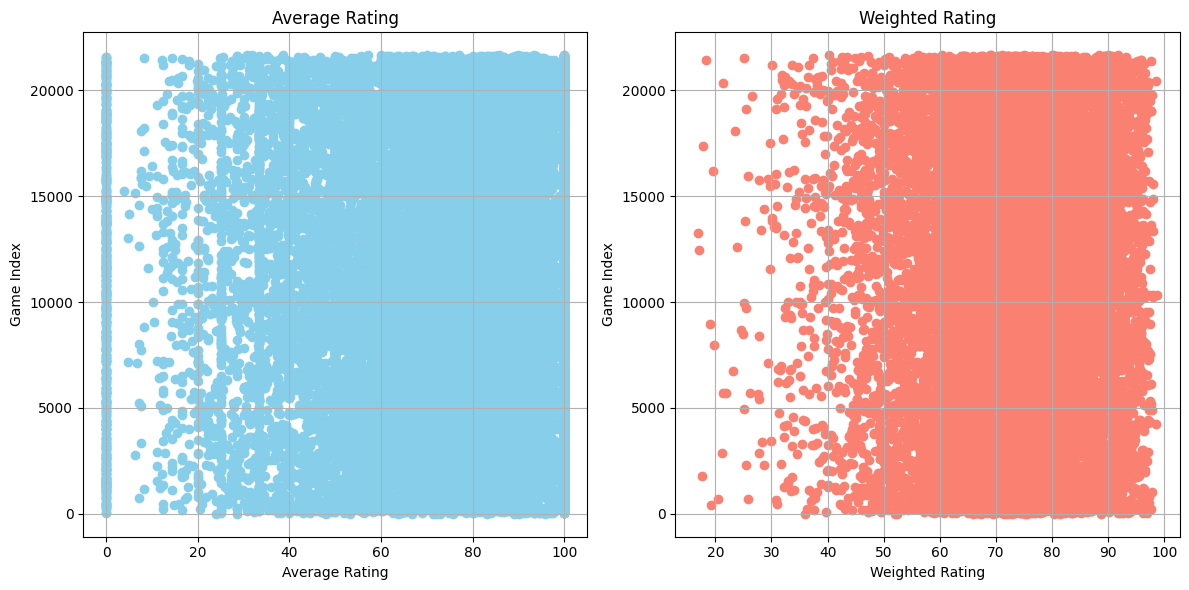

In [390]:
# Create a figure and two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot average rating
axs[0].scatter(features_train['ratings'], range(len(features_train)), color='skyblue', label='Average Rating')
axs[0].set_title('Average Rating')
axs[0].set_xlabel('Average Rating')
axs[0].set_ylabel('Game Index')
axs[0].grid(True)

# Plot weighted rating
axs[1].scatter(features_train['weighted_rating'], range(len(features_train)), color='salmon', label='Weighted Rating')
axs[1].set_title('Weighted Rating')
axs[1].set_xlabel('Weighted Rating')
axs[1].set_ylabel('Game Index')
axs[1].grid(True)

plt.tight_layout()
plt.show()

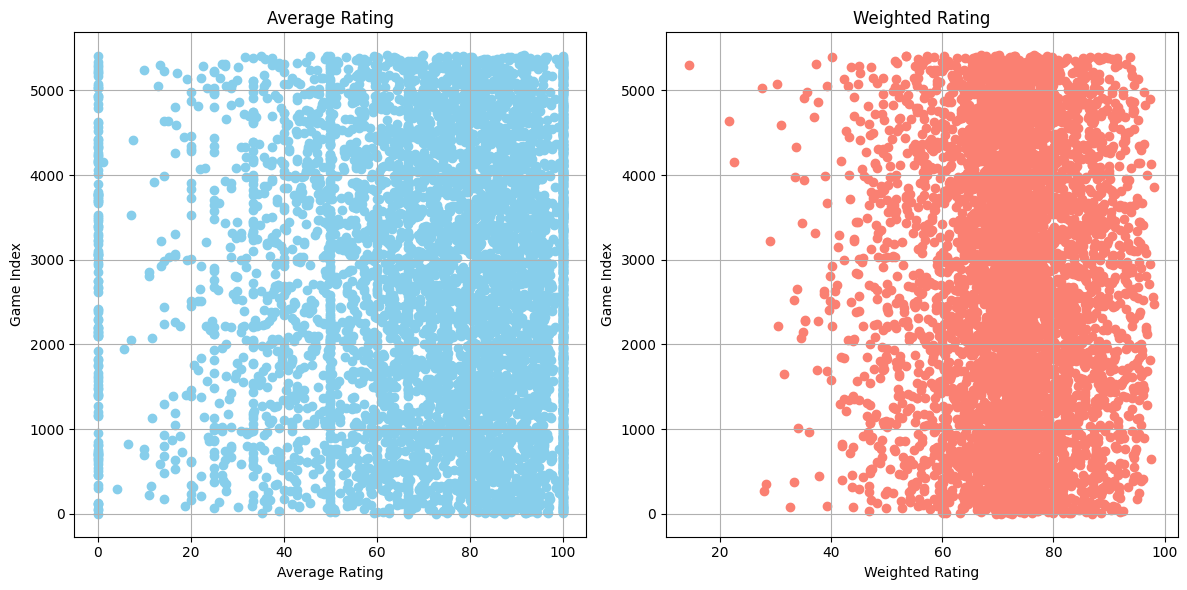

In [391]:
# Create a figure and two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot average rating
axs[0].scatter(features_test['ratings'], range(len(features_test)), color='skyblue', label='Average Rating')
axs[0].set_title('Average Rating')
axs[0].set_xlabel('Average Rating')
axs[0].set_ylabel('Game Index')
axs[0].grid(True)

# Plot weighted rating
axs[1].scatter(features_test['weighted_rating'], range(len(features_test)), color='salmon', label='Weighted Rating')
axs[1].set_title('Weighted Rating')
axs[1].set_xlabel('Weighted Rating')
axs[1].set_ylabel('Game Index')
axs[1].grid(True)

plt.tight_layout()
plt.show()

## Game genres feature classification
In this section, we decided to convert each genre to a numerical value using a method called frequency based encoding.

We keep track of all genres encountered and aggregate them together in a dictionary. A game with multiple genres will hold a value according to its most popular genre.

In [392]:
genres_series = features_train['genres'].str.split(';').explode()
num_genres = genres_series.nunique()
print("Number of unique genres:", num_genres)

Number of unique genres: 27


In [393]:
# Frequency-Based Encoding
genre_counts = features_train['genres'].str.split(';').explode().value_counts()
genre_mapping = {genre: i for i, genre in enumerate(genre_counts.index)}
features_train['encoded_genre'] = features_train['genres'].str.split(';').str[0].map(genre_mapping)

print("Genre Mapping for Frequency-Based Encoding:")
for genre, encoding in genre_mapping.items():
    print(f"{genre}: {encoding}")

Genre Mapping for Frequency-Based Encoding:
Indie: 0
Action: 1
Casual: 2
Adventure: 3
Strategy: 4
Simulation: 5
RPG: 6
Early Access: 7
Free to Play: 8
Sports: 9
Racing: 10
Violent: 11
Massively Multiplayer: 12
Gore: 13
Nudity: 14
Sexual Content: 15
Utilities: 16
Design & Illustration: 17
Animation & Modeling: 18
Education: 19
Video Production: 20
Software Training: 21
Web Publishing: 22
Audio Production: 23
Game Development: 24
Photo Editing: 25
Accounting: 26


In [394]:
genres_series = features_test['genres'].str.split(';').explode()
num_genres = genres_series.nunique()
print("Number of unique genres:", num_genres)

Number of unique genres: 29


In [395]:
# Frequency-Based Encoding
genre_counts = features_test['genres'].str.split(';').explode().value_counts()
genre_mapping = {genre: i for i, genre in enumerate(genre_counts.index)}
features_test['encoded_genre'] = features_test['genres'].str.split(';').str[0].map(genre_mapping)

print("Genre Mapping for Frequency-Based Encoding:")
for genre, encoding in genre_mapping.items():
    print(f"{genre}: {encoding}")

Genre Mapping for Frequency-Based Encoding:
Indie: 0
Action: 1
Adventure: 2
Casual: 3
Strategy: 4
Simulation: 5
RPG: 6
Early Access: 7
Free to Play: 8
Sports: 9
Racing: 10
Massively Multiplayer: 11
Violent: 12
Gore: 13
Nudity: 14
Sexual Content: 15
Utilities: 16
Animation & Modeling: 17
Design & Illustration: 18
Education: 19
Video Production: 20
Audio Production: 21
Software Training: 22
Web Publishing: 23
Game Development: 24
Accounting: 25
Documentary: 26
Tutorial: 27
Photo Editing: 28


## K-means classification: Elbow Method
We used the elbow to determine what is the optimal number of clusters for the weighted ratings.

Basically we wanted to categorize the weighted ratings, so we chose k_means in order to categorize the ratings.

The elbow method tells us that the optimal number of clusters is going to be 3.

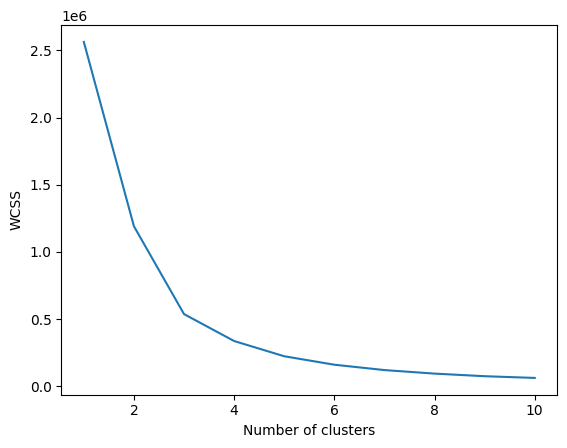

In [396]:
# We are using the elbow method to determine what is the optimal number of clusters for weighted rating
# Isolating the 'weighted_rating' column for K-means
warnings.filterwarnings('ignore') # disable warnings
X = features_train[['weighted_rating']]
wcss = [] #initialize WCSS (Within-Cluster Sum of Square)
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state= 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Clusters rating distribution
We now want to evaluate how the clustering affects our original ratings data.

We display the rating distribution of each label and notice that the separator values are appropriate given the context of our problem.

The distribution also seems to follow a standard bell curve (although the order is messed up), which follows the original distribution.

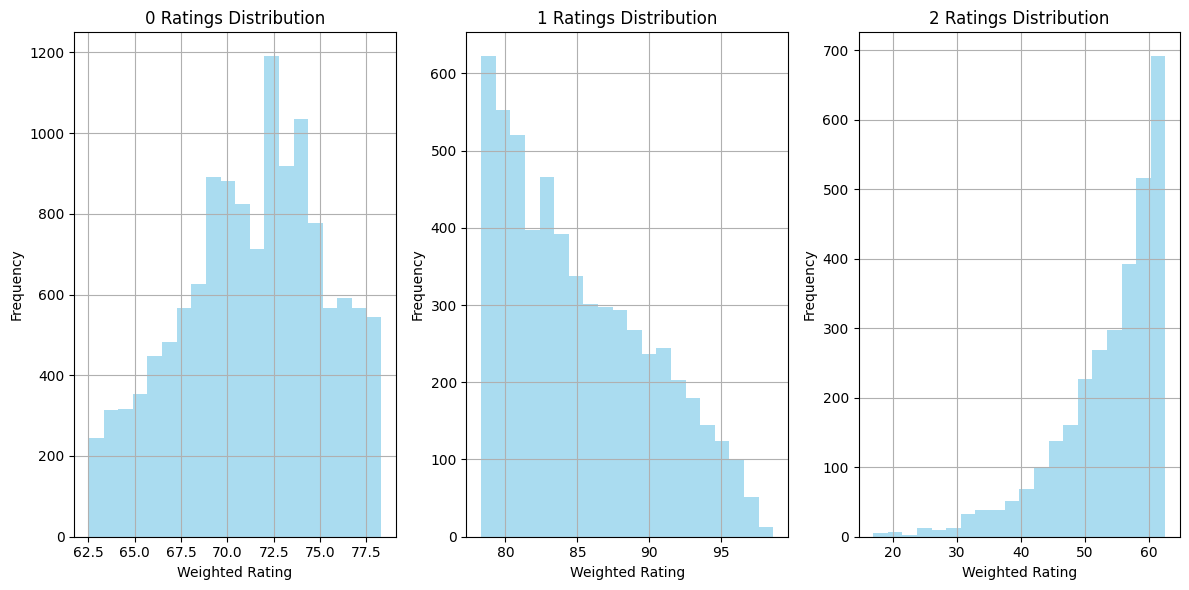

In [397]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
features_train["labels"] =  kmeans.labels_
num_categories = 3
labels = [0, 1, 2]
plt.figure(figsize=(12, 6))
for i, category in enumerate(labels):
    plt.subplot(1, num_categories, i + 1)
    category_data = features_train[features_train['labels'] == category]
    plt.hist(category_data['weighted_rating'], bins=20, color='skyblue', alpha=0.7)
    plt.title(f'{category} Ratings Distribution')
    plt.xlabel('Weighted Rating')
    plt.ylabel('Frequency')
    plt.grid(True)
plt.tight_layout()
plt.show()

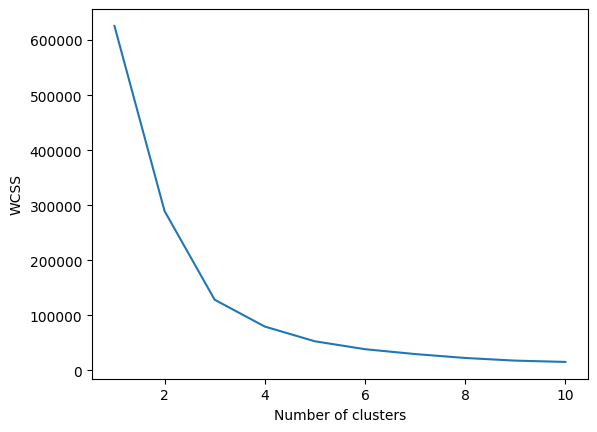

In [398]:
# We are using the elbow method to determine what is the optimal number of clusters for weighted rating
# Isolating the 'weighted_rating' column for K-means
warnings.filterwarnings('ignore') # disable warnings
X = features_test[['weighted_rating']]
wcss = [] #initialize WCSS (Within-Cluster Sum of Square)
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state= 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

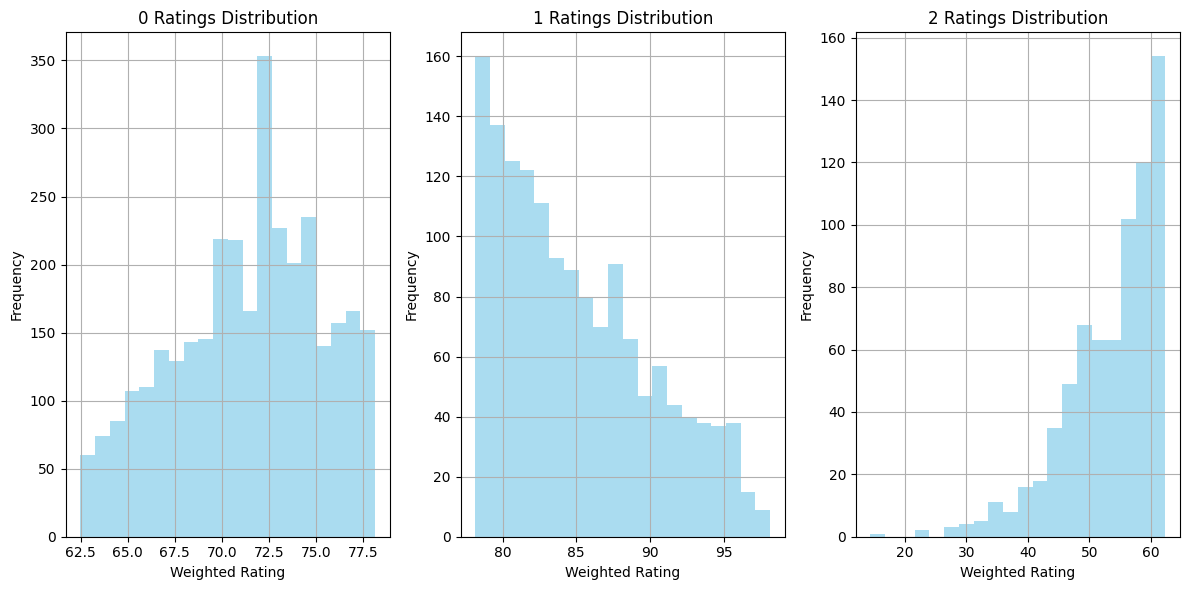

In [399]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
features_test["labels"] =  kmeans.labels_
num_categories = 3
labels = [0, 1, 2]
plt.figure(figsize=(12, 6))
for i, category in enumerate(labels):
    plt.subplot(1, num_categories, i + 1)
    category_data = features_test[features_test['labels'] == category]
    plt.hist(category_data['weighted_rating'], bins=20, color='skyblue', alpha=0.7)
    plt.title(f'{category} Ratings Distribution')
    plt.xlabel('Weighted Rating')
    plt.ylabel('Frequency')
    plt.grid(True)
plt.tight_layout()
plt.show()

#### Data imbalance
There is class imbalance however we have good f1 - scores, precision and recall for every feature. This is explained due to robsutness of decision trees against imbalance distribution and the high correlation between average developer and popular ratings

In [400]:
features_train['labels'].value_counts()

labels
0    12849
1     5740
2     3071
Name: count, dtype: int64

In [401]:
features_test['labels'].value_counts()

labels
0    3224
1    1469
2     722
Name: count, dtype: int64

## Developer/Publisher data processing
We will use the developers' popularity by calculating the number of games each developer did. 

This indication can give us insight about how big developers in th industry can affect the rating of the game.

In the case there are multiple developers for the same game we will get the average of the developers popularity.

In [402]:
features_train["developers_list"] = features_train["developers"].str.split(';')
exploded_data =  features_train.explode('developers_list')
developer_counts_exploded = exploded_data["developers_list"].value_counts()
exploded_data['developer_freq'] = exploded_data['developers_list'].map(developer_counts_exploded)
avg_developer_freq = exploded_data.groupby(exploded_data.index).agg({'developer_freq': 'mean'})
features_train["avg_developer_freq"] = avg_developer_freq["developer_freq"]
developer_counts_exploded

developers_list
Choice of Games               69
KOEI TECMO GAMES CO., LTD.    62
Ripknot Systems               49
Laush Dmitriy Sergeevich      40
RewindApp                     40
                              ..
Tigerish Games                 1
Miroko                         1
Lag Studios                    1
Bono Games                     1
Atomic Wolf                    1
Name: count, Length: 15070, dtype: int64

In [403]:
features_test["developers_list"] = features_test["developers"].str.split(';')
exploded_data =  features_test.explode('developers_list')
developer_counts_exploded = exploded_data["developers_list"].value_counts()
exploded_data['developer_freq'] = exploded_data['developers_list'].map(developer_counts_exploded)
avg_developer_freq = exploded_data.groupby(exploded_data.index).agg({'developer_freq': 'mean'})
features_test["avg_developer_freq"] = avg_developer_freq["developer_freq"]
developer_counts_exploded

developers_list
Choice of Games               25
Ripknot Systems               13
KOEI TECMO GAMES CO., LTD.    13
For Kids                      12
Nikita "Ghost_RUS"            12
                              ..
Dreamatrix                     1
Action Panel                   1
07th Expansion                 1
PixelMouse                     1
Game Mechanics LLC             1
Name: count, Length: 4838, dtype: int64

In [404]:
features_train["publisher_list"] = features_train["publishers"].str.split(';')
exploded_data =  features_train.explode('publisher_list')
publisher_counts_exploded = exploded_data["publisher_list"].value_counts()
exploded_data['publisher_freq'] = exploded_data['publisher_list'].map(publisher_counts_exploded)
avg_publisher_freq = exploded_data.groupby(exploded_data.index).agg({'publisher_freq': 'mean'})
features_train["avg_publisher_freq"] = avg_publisher_freq["publisher_freq"]
publisher_counts_exploded

publisher_list
Big Fish Games        176
Strategy First        114
THQ Nordic             96
Square Enix            92
Plug In Digital        90
                     ... 
Harsh Reality           1
Tomislav Kadežabek      1
Rablo Games             1
Jenny Bee Presents      1
Atomic Wolf             1
Name: count, Length: 12018, dtype: int64

In [405]:
features_test["publisher_list"] = features_test["publishers"].str.split(';')
exploded_data =  features_test.explode('publisher_list')
publisher_counts_exploded = exploded_data["publisher_list"].value_counts()
exploded_data['publisher_freq'] = exploded_data['publisher_list'].map(publisher_counts_exploded)
avg_publisher_freq = exploded_data.groupby(exploded_data.index).agg({'publisher_freq': 'mean'})
features_test["avg_publisher_freq"] = avg_publisher_freq["publisher_freq"]
publisher_counts_exploded

publisher_list
Big Fish Games        36
Ubisoft               27
Choice of Games       25
THQ Nordic            23
Nightdive Studios     22
                      ..
Maximilian Ritters     1
MAJ Studio             1
Image & Form Games     1
Steve "Khad" Grant     1
Game Mechanics LLC     1
Name: count, Length: 3932, dtype: int64

## Average developer rating
As part of our data engineering strategy to extract more information from existing data, we calculated the average rating for all games created by each developer. This metric serves as a reliable indicator of quality, since it is expected that larger companies are more likely to produce high-quality games that receive favorable ratings from users.

In [406]:
# Calculating the average rating for each developer
developer_avg_rating = features_train.groupby('developers')['weighted_rating'].mean().rename('developer_avg_rating')

# Joining the average rating back to the original dataframe
features_train = features_train.join(developer_avg_rating, on='developers')


In [407]:

print(developer_avg_rating.head())

developers
'What Day is it?' Games       72.952286
(STCG) Smoker The Car Game    69.211143
+7 Software                   81.471785
+Mpact Games, LLC.            79.192277
-Yodasaurus- Games            79.576216
Name: developer_avg_rating, dtype: float64


In [408]:
# Calculating the average rating for each developer
developer_avg_rating = features_test.groupby('developers')['weighted_rating'].mean().rename('developer_avg_rating')

# Joining the average rating back to the original dataframe
features_test = features_test.join(developer_avg_rating, on='developers')

In [409]:
print(developer_avg_rating.head())

developers
#workshop         94.507875
07th Expansion    95.883328
08 Games          89.257943
10Ants Hill       45.748889
10tons Ltd        84.792198
Name: developer_avg_rating, dtype: float64


## Average publisher rating

In [410]:
# Calculating the average rating for each developer
publisher_avg_rating = features_train.groupby('publishers')['weighted_rating'].mean().rename('publisher_avg_rating')

# Joining the average rating back to the original dataframe
features_train = features_train.join(publisher_avg_rating, on='publishers')


In [411]:
print(publisher_avg_rating)

publishers
                        76.075436
  Milestone S.r.l.      67.935531
 AFBIK Studio           72.373186
 AYE Technology         52.529400
 Anea_Duo_Dev           68.165331
                          ...    
雷武游戏                    63.993340
香港商河洛互動娛樂股份有限公司;方块游戏    59.225257
魂动天下                    73.664068
魔力乐章                    73.790585
수프림                     74.980864
Name: publisher_avg_rating, Length: 12009, dtype: float64


In [412]:
# Calculating the average rating for each developer
publisher_avg_rating = features_test.groupby('publishers')['weighted_rating'].mean().rename('publisher_avg_rating')

# Joining the average rating back to the original dataframe
features_test = features_test.join(publisher_avg_rating, on='publishers')

In [413]:
print(publisher_avg_rating)

publishers
                          88.486278
 Fury Games Production    41.906062
 Game for people          65.042076
 Game for people\t        59.844428
 Maciej Targoni           86.296165
                            ...    
重庆焱玩网络科技有限公司              72.442087
重庆第五维科技有限公司               69.727954
阿达游戏                      64.346502
頂点α                       67.038233
飞鹰互娱                      76.034838
Name: publisher_avg_rating, Length: 3895, dtype: float64


## Correlation Coefficient

In [414]:
feature_train_set = features_train[['avg_publisher_freq','avg_developer_freq','encoded_genre','average_playtime','median_playtime','publisher_avg_rating','developer_avg_rating','weighted_rating','price']]
feature_train_set.head()

,avg_publisher_freq,avg_developer_freq,encoded_genre,average_playtime,median_playtime,publisher_avg_rating,developer_avg_rating,weighted_rating,price
1807,47.0,19.0,3,239,249,79.782210,83.503205,88.634504,16.99
25093,4.0,1.0,1,0,0,55.772515,35.966867,35.966867,17.99
8355,1.0,1.0,3,0,0,75.538546,75.538546,75.538546,6.99
6151,17.0,3.0,3,174,174,80.228955,68.255317,75.258130,10.99
21814,1.0,1.0,1,0,0,81.341603,81.341603,81.341603,9.99


### Correlation between features
1- avg_developer_freq: This feature likely represents the frequency with which a developer releases games. The negative correlation coefficient suggests that developers who release games more frequently may have a slightly lower weighted rating. This could imply that developers who take more time between releases might produce higher quality games, or it might reflect a bias towards more established developers who have a larger back catalog.

2- encoded_genre: Since genres are categorical, they are encoded numerically to be used in statistical models. The negative correlation here is minimal and, as previously mentioned, it doesn't hold much significance because we cannot interpret the correlation of categorical data with continuous data directly after encoding.

3- average_playtime: This feature likely represents the average amount of time players spend in the game. The small positive correlation could suggest that games with longer playtimes might be slightly more engaging or valuable to players, thus leading to higher ratings.

4- median_playtime: Similar to average playtime, this is a measure of how long players spend in the game but focuses on the median value, which is less affected by extreme outliers. The correlation is positive but even weaker than the average playtime, which again may point to a slight tendency for games that engage players longer to be rated higher.

5- publisher_avg_rating: This shows a strong positive correlation, indicating that publishers with a higher average rating tend to release games that are also highly rated. This might be due to consistent quality controls, a strong brand reputation, or a track record of successful games.

6- developer_avg_rating: Very similar to the publisher's average rating, this also shows a strong positive correlation with the weighted rating. It implies that the historical average rating of a developer is a good predictor of the ratings of their future games.

7- price: This feature's positive correlation with weighted ratings indicates that more expensive games tend to receive higher ratings. This could be interpreted in several ways: it might mean that higher-quality games command higher prices, or it could suggest that player expectations and perceptions of value influence their ratings.

In [415]:
feature_train_set[feature_train_set.columns[1:]].corr()['weighted_rating'][:]

avg_developer_freq     -0.030306
encoded_genre          -0.043263
average_playtime        0.049765
median_playtime         0.024219
publisher_avg_rating    0.816302
developer_avg_rating    0.889667
weighted_rating         1.000000
price                   0.123221
Name: weighted_rating, dtype: float64

### Splitting to training and test

In [418]:
X_train = features_train[['avg_publisher_freq','avg_developer_freq','encoded_genre','average_playtime','median_playtime','publisher_avg_rating','developer_avg_rating','price']]

y_train = features_train[["labels"]]

X_test = features_test[['avg_publisher_freq','avg_developer_freq','encoded_genre','average_playtime','median_playtime','publisher_avg_rating','developer_avg_rating','price']]
y_test = features_test[["labels"]]

# Data Training
After processing the dataset we are now ready to move on to training our data models. 

We use the standard split of 80-20 to first train then test the performance of our models.

## Random Forest

Random Forest combines multiple decision trees to make predictions for each of the game's rating. Each decision tree in the forest is trained independently on a random subset of the training data. 

To make predictions of each game's rating on steam, each decision tree independently predicts the rating first and then the final prediction is done by aggregating the predictions of all the trees. 

In this case, we use the average of all the trees to get the final result for the rating.

In [419]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# reshape y to remove warning
y_train = column_or_1d(ravel(y_train), warn=True)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3224
           1       0.94      0.91      0.92      1469
           2       0.91      0.86      0.88       722

    accuracy                           0.93      5415
   macro avg       0.93      0.91      0.92      5415
weighted avg       0.93      0.93      0.93      5415



## XG Boost

XG Boost also known Extreme Gradient Boosting, is another predictive model that combines multiple deicision trees, in a sequential manner.


Each new tree in XG Boost corrects errors made by the previous trees. In other words, each new tree focuses on the residuals, the differences between the actual and predicted values of the model built so far.


During the training process, it calculates the gradients of the loss function with respect to the predictions, and then updates the model parameters in the direction that minimizes the loss.


When everything is done, it gives you the end result which in this case is the steam game rating.

In [420]:
from xgboost import XGBClassifier

model = XGBClassifier(objective='multi:softprob', num_class=3, eval_metric="mlogloss")

model.fit(X_train, y_train)

# Predicting classes directly
y_pred = model.predict(X_test)

# For probability predictions
y_pred_proba = model.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9320406278855032
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3224
           1       0.94      0.91      0.93      1469
           2       0.90      0.86      0.88       722

    accuracy                           0.93      5415
   macro avg       0.93      0.91      0.92      5415
weighted avg       0.93      0.93      0.93      5415



## Support Vector Machine (SVM)


SVM is a model that learns to predict the ratings of games by analyzing the provided features and finding the hyperplane that separates different groups of games with different ratings.

It uses the hyperplane as decision boundary to classfiy games into their respective rating categories.

Through the use of kernel functions, the SVM model can handle linear and nonlinear data by transforming the inputs into higher dimensional spaces which helps it effectively determine relationships and patterns in the features provided.

In [421]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

# Assuming X_train, X_test, y_train, and y_test are defined and X_train/X_test may contain NaN values

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# You can also standardize your data as part of the same pipeline
pipeline = make_pipeline(imputer, StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='auto'))

# reshape y to remove warning
y_train = column_or_1d(ravel(y_train), warn=True)
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Use the pipeline to predict outcomes for the test set
y_pred = pipeline.predict(X_test)

# Evaluate the predictions
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9124653739612189
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3224
           1       0.94      0.87      0.90      1469
           2       0.92      0.80      0.86       722

    accuracy                           0.91      5415
   macro avg       0.92      0.88      0.90      5415
weighted avg       0.91      0.91      0.91      5415



## Comparison of models

Upon comparing the accuracy scores of the models tested, XG Boost scored the highest, meaning that it predicted the game ratings the most accurately. 

Although XG Boost had the greatest accuracy at 87.15%, Random forest and SVM were very close at at 86% & 85.72% respectively.

The F1-Score is the harmonic mean of precision and recall and gives a balance between the two. Both XGBoost and Random Forest have higher F1-scores, suggesting a good balance between precision and recall for these models. 

SVM, while still performing reasonably well, shows slightly lower F1-scores compared to the other models.

In conclusion, XG Boost seems to performs the best when looking at its accuracy and its f1-score with Random Forest right behind it. 
